# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

<AxesSubplot:>

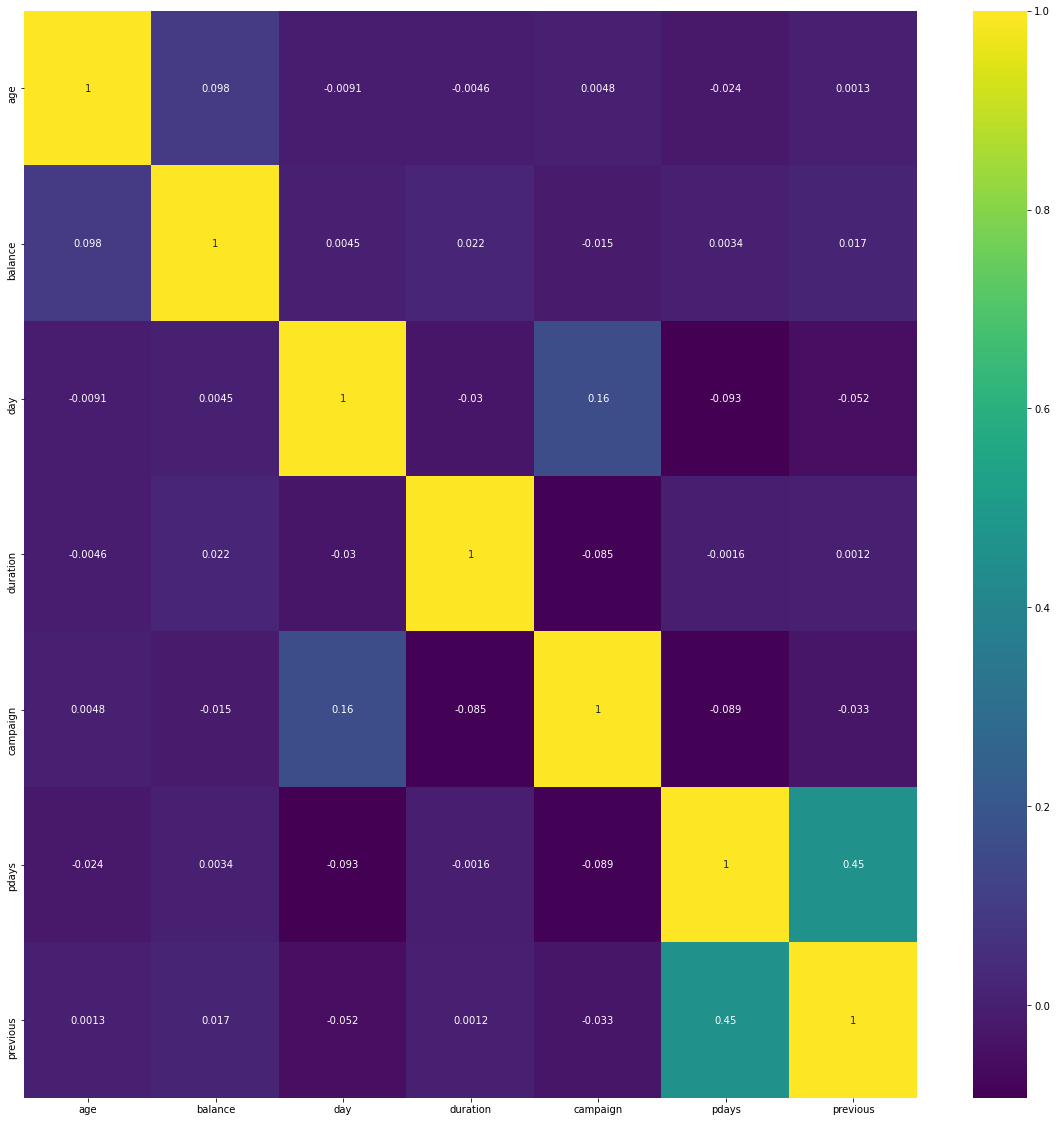

In [6]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

#### The features don't seem to be having high correlation between eachother

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

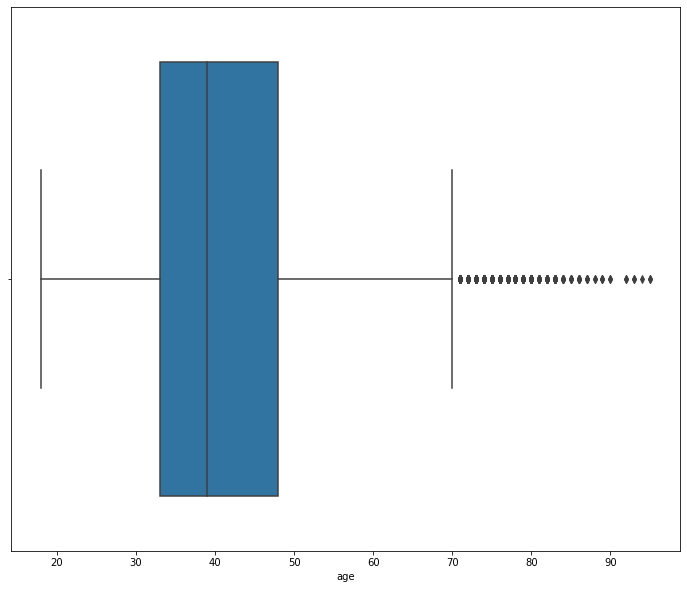

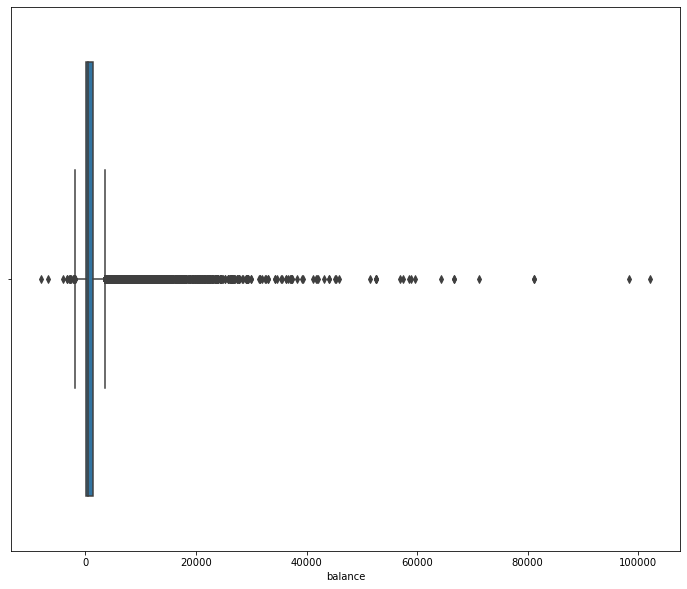

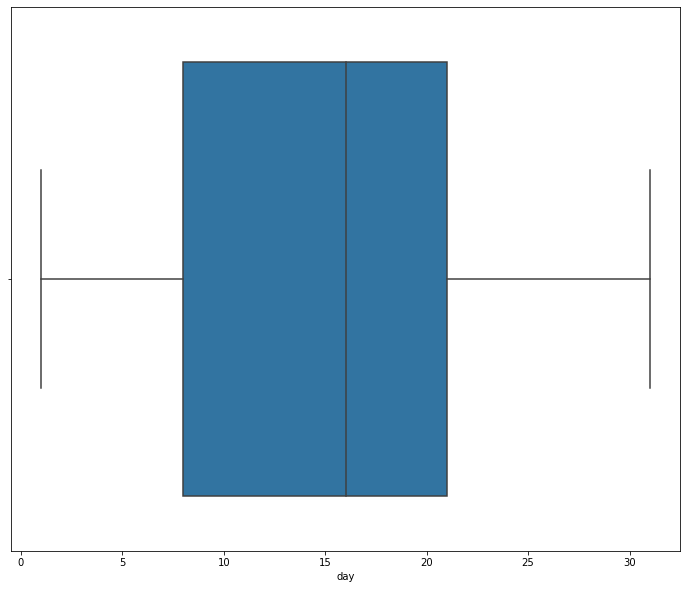

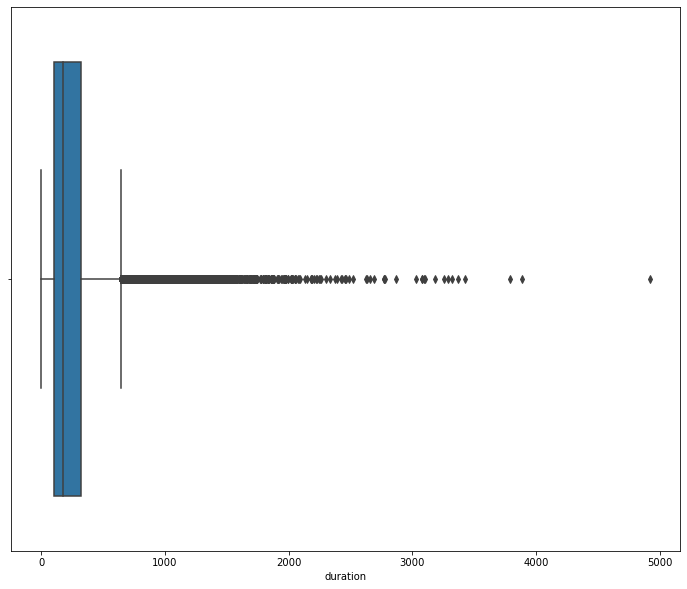

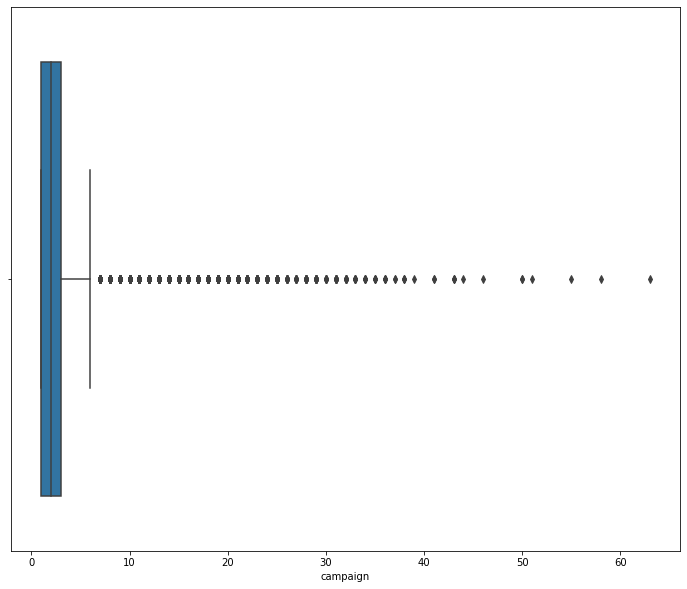

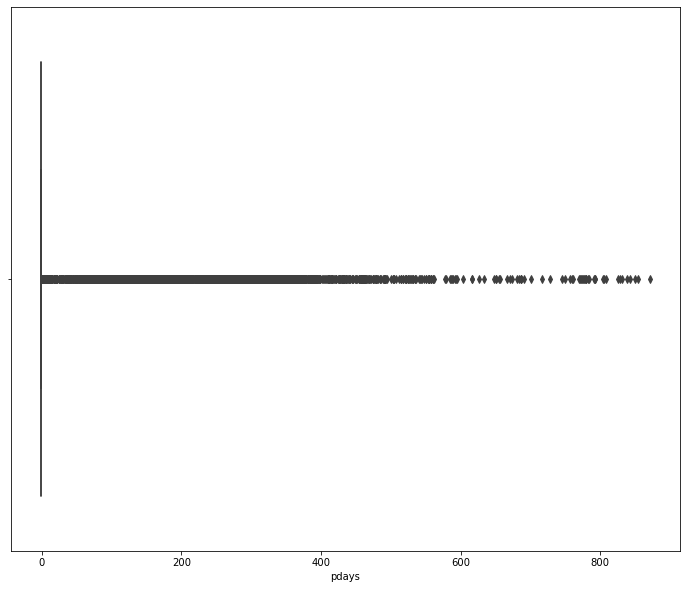

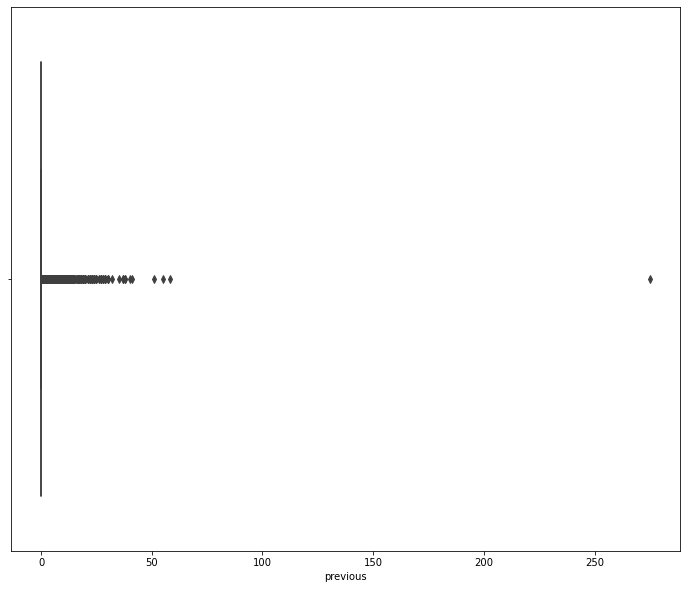

In [8]:
for i in data.describe().columns:
    
    plt.figure(figsize = (12,10))
    sns.boxplot(data[i])

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


## Feature Engineering

In [10]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

#### Age

<AxesSubplot:xlabel='age', ylabel='Density'>

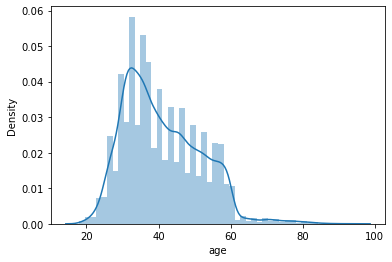

In [12]:
sns.distplot(data['age'])

The distribution is positively skewed 

#### Job

In [13]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [14]:
jobenc = LabelEncoder()

In [15]:
data['job'] = jobenc.fit_transform(data['job'])

In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
jobhot = OneHotEncoder(sparse = False)

In [18]:
jobhot.fit(data[['job']])

OneHotEncoder(sparse=False)

In [19]:
jobhot.fit_transform(data[['job']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [20]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
jobs = pd.DataFrame(jobhot.fit_transform(data[['job']]))

In [22]:
data = pd.concat([data,jobs], axis = 1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,2,3,4,5,6,7,8,9,10,11
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,9,single,secondary,no,29,yes,no,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33,2,married,secondary,no,2,yes,yes,unknown,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,1,married,unknown,no,1506,yes,no,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,11,single,unknown,no,1,no,no,unknown,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### How we dealt with 'job' we will deal with the rest of the categorical columns.

In [23]:
data.dtypes

age            int64
job            int32
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
Target        object
0            float64
1            float64
2            float64
3            float64
4            float64
5            float64
6            float64
7            float64
8            float64
9            float64
10           float64
11           float64
dtype: object

In [24]:
categorical_columns = ['marital','education','default','housing','loan','contact','month','poutcome']

In [25]:
HotEncoder = OneHotEncoder(sparse = False)
LabelEnc = LabelEncoder()

In [26]:
for i in categorical_columns:
    data[i] = LabelEnc.fit_transform(data[i])
    data = pd.concat([data, pd.DataFrame(HotEncoder.fit_transform(data[[i]]))], axis = 1)
data.head()    

,age,job,marital,education,default,balance,housing,loan,contact,day,...,6,7,8,9,10,11,0,1,2,3
0,58,4,1,2,0,2143,1,0,2,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,9,2,1,0,29,1,0,2,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,1,1,0,2,1,1,2,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1,1,3,0,1506,1,0,2,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,11,2,3,0,1,0,0,2,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
FinalData = data.drop(columns = ['job','marital','education','default','housing','loan','contact','month','poutcome'])

In [28]:
FinalData.head()

,age,balance,day,duration,campaign,pdays,previous,Target,0,1,...,6,7,8,9,10,11,0,1,2,3
0,58,2143,5,261,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,no,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
X = FinalData.drop('Target', axis = 1)
y = FinalData['Target']

In [30]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: Target, dtype: object

In [31]:
for i in range(len(y)):
    if y[i] == 'no':
        y[i] = 0
    if y[i] == 'yes':
        y[i] = 1

In [32]:
y.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [33]:
X.columns

Index([     'age',  'balance',      'day', 'duration', 'campaign',    'pdays',
       'previous',          0,          1,          2,          3,          4,
                5,          6,          7,          8,          9,         10,
               11,          0,          1,          2,          0,          1,
                2,          3,          0,          1,          0,          1,
                0,          1,          0,          1,          2,          0,
                1,          2,          3,          4,          5,          6,
                7,          8,          9,         10,         11,          0,
                1,          2,          3],
      dtype='object')

Documentation --> duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet,
the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [34]:
X = X.drop('duration', axis = 1)

In [35]:
X.head()

,age,balance,day,campaign,pdays,previous,0,1,2,3,...,6,7,8,9,10,11,0,1,2,3
0,58,2143,5,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,1,-1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,1,-1,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
y=y.astype('int')

## Before starting to build the models, I am going to use PCA to reduce the number of features

In [37]:
from sklearn.decomposition import PCA

for i in range(8,15):
    pca = PCA(n_components=i) # i chose to reduce the features to 10
    pca.fit(X)
    print('Value of variance when using {} components is: {}'.format(i,pca.explained_variance_ratio_.sum()))

Value of variance when using 8 components is: 0.9999996781425554
Value of variance when using 9 components is: 0.9999997185431976
Value of variance when using 10 components is: 0.9999997554640635
Value of variance when using 11 components is: 0.9999997843380548
Value of variance when using 12 components is: 0.999999810560308
Value of variance when using 13 components is: 0.9999998288754476
Value of variance when using 14 components is: 0.9999998458349075


### We can use PCA to reduce the model to 8 features

In [38]:
pca = PCA(n_components = 8)
pca.fit(X)
scores = pca.transform(X)
scores = pd.DataFrame(scores, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,780.728943,-41.244041,16.942907,-10.833826,-1.162095,-0.228244,0.827327,-1.542557
1,-1333.275734,-40.970112,3.641831,-11.130597,-1.176430,-0.182054,1.076195,0.012240
2,-1360.279496,-40.939070,-7.306906,-11.393737,-1.145198,-0.160526,1.267998,0.221821
3,143.725206,-41.143964,6.173492,-11.088681,-1.148851,-0.214788,1.333568,-0.539187
4,-1361.279447,-40.939879,-7.315402,-11.393356,-1.145970,-0.141137,-0.052909,-0.333551


In [39]:
X = scores

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

# Building my Models

### 1.SVM

In [41]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)
print('SVC score is: {}%'.format(svm_model.score(X_test,y_test) * 100))

SVC score is: 88.45439263912236%


In [42]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
print(metrics.confusion_matrix(svm_model.predict(X_test),y_test))

<IPython.core.display.Javascript object>

[[9998 1305]
 [   0    0]]


<IPython.core.display.Javascript object>

<AxesSubplot:>

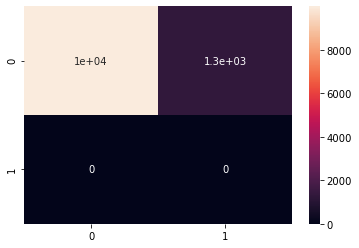

In [44]:
sns.heatmap(metrics.confusion_matrix(svm_model.predict(X_test),y_test), annot = True)

In [45]:
print('...' * 10)
print('Classification Report')
print(metrics.classification_report(svm_model.predict(X_test),y_test))

..............................
Classification Report


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     11303
           1       0.00      0.00      0.00         0

    accuracy                           0.88     11303
   macro avg       0.50      0.44      0.47     11303
weighted avg       1.00      0.88      0.94     11303



In [46]:
y_test.value_counts()

0    9998
1    1305
Name: Target, dtype: int64

### The data is imbalanced and that's why the model is unbiased and only predicts 1.We can solve this problem using Downsampling but first we have to redefine X,y.

In [47]:
X = scores
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,780.728943,-41.244041,16.942907,-10.833826,-1.162095,-0.228244,0.827327,-1.542557
1,-1333.275734,-40.970112,3.641831,-11.130597,-1.176430,-0.182054,1.076195,0.012240
2,-1360.279496,-40.939070,-7.306906,-11.393737,-1.145198,-0.160526,1.267998,0.221821
3,143.725206,-41.143964,6.173492,-11.088681,-1.148851,-0.214788,1.333568,-0.539187
4,-1361.279447,-40.939879,-7.315402,-11.393356,-1.145970,-0.141137,-0.052909,-0.333551


In [48]:
data = pd.concat([X,y], axis = 1)
data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Target
0,780.728943,-41.244041,16.942907,-10.833826,-1.162095,-0.228244,0.827327,-1.542557,0
1,-1333.275734,-40.970112,3.641831,-11.130597,-1.176430,-0.182054,1.076195,0.012240,0
2,-1360.279496,-40.939070,-7.306906,-11.393737,-1.145198,-0.160526,1.267998,0.221821,0
3,143.725206,-41.143964,6.173492,-11.088681,-1.148851,-0.214788,1.333568,-0.539187,0
4,-1361.279447,-40.939879,-7.315402,-11.393356,-1.145970,-0.141137,-0.052909,-0.333551,0


In [49]:
data['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [50]:
from sklearn.utils import resample

In [51]:
yes = data[data['Target'] == 1]
no = data[data['Target'] == 0]


In [52]:
DownSample = resample(no, replace = True, n_samples = len(yes), random_state = 88)
DownSample = pd.concat([yes,DownSample])
DownSample['Target'].value_counts()

0    5289
1    5289
Name: Target, dtype: int64

In [53]:
X = DownSample.drop('Target', axis = 1)
y = DownSample['Target']

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

In [55]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)
print('SVC score is: {}%'.format(svm_model.score(X_test,y_test) * 100))

SVC score is: 55.65217391304348%


In [56]:
print('...' * 10)
print('Classification Report')
print(metrics.classification_report(svm_model.predict(X_test),y_test))

..............................
Classification Report


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.68      0.54      0.60      1632
           1       0.44      0.59      0.50      1013

    accuracy                           0.56      2645
   macro avg       0.56      0.56      0.55      2645
weighted avg       0.59      0.56      0.56      2645



#### It looks like our model's 88% performance was only due to the fact that the data was unbalanced.We still have to 
#### try several models until we reach a good accuracy.

## 2.Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [59]:
print('Score of Logistic Regression is: {}%'.format(logreg.score(X_test,y_test) * 100))

Score of Logistic Regression is: 64.80151228733459%


#### we notice an improvement compared to the svm.

## 3.KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


MyModelPredictions = []

for i in range(1,50):
    
    
    Model =  KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(Model,X,y, cv =10)
    MyModelPredictions.append(score.mean())

In [61]:
max(MyModelPredictions)

0.5982426992254356

### Unfortunately, KNN has a max accuracy of 59.82%.Not good enough

## 4.Ensembling Techniques

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [64]:
print('Accuracy of Random Forest: {}%'.format(rf.score(X_test,y_test) * 100))

Accuracy of Random Forest: 69.33837429111531%


In [65]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of AdaBoost : {}%'.format(accuracy_score(y_test, y_pred) * 100))

Accuracy of AdaBoost : 67.10775047258979%


In [68]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of GradientBoost : {}%'.format(accuracy_score(y_test, y_pred) * 100))

Accuracy of GradientBoost : 68.88468809073724%


### Best accuracy is Random Forest Classifier --> 69.11%

## 5.Catboost

### to use catboost we have to go back to the data before applyong dimensionality reduction.

In [69]:
FinalData.head()

,age,balance,day,duration,campaign,pdays,previous,Target,0,1,...,6,7,8,9,10,11,0,1,2,3
0,58,2143,5,261,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,no,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
for i in range(len(FinalData['Target'])):
    if FinalData.iloc[i,7] == 'no':
        FinalData.iloc[i,7] = 0
    if FinalData.iloc[i,7] == 'yes':
        FinalData.iloc[i,7] = 1

downsampling again

In [71]:
yes = FinalData[FinalData['Target'] == 1]
no = FinalData[FinalData['Target'] == 0]


DownSample = resample(no, replace = True, n_samples = len(yes), random_state = 88)
DownSample = pd.concat([yes,DownSample])
DownSample['Target'].value_counts()

0    5289
1    5289
Name: Target, dtype: int64

In [72]:
DownSample.head()

,age,balance,day,duration,campaign,pdays,previous,Target,0,1,...,6,7,8,9,10,11,0,1,2,3
83,59,2343,5,1042,1,-1,0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86,56,45,5,1467,1,-1,0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87,41,1270,5,1389,1,-1,0,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
129,55,2476,5,579,1,-1,0,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
168,54,184,5,673,2,-1,0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### before using catboost we must have unique column names

In [73]:
new_columns = [np.arange(1,53)]
new_columns

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52])]

In [74]:
DownSample.columns = new_columns 

In [75]:
DownSample.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
83,59,2343,5,1042,1,-1,0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86,56,45,5,1467,1,-1,0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87,41,1270,5,1389,1,-1,0,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
129,55,2476,5,579,1,-1,0,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
168,54,184,5,673,2,-1,0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
X = DownSample.drop(columns = [4,8],axis = 1)
y = DownSample[8]

In [77]:
y = y.astype('int')

In [78]:
y.value_counts()

(8,)
0       5289
1       5289
dtype: int64

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

In [80]:
DownSample.shape

(10578, 52)

In [81]:
%%time
from catboost import CatBoostClassifier

parameters = {'loss_function' :'Logloss',
              'eval_metric' : 'AUC',
              'verbose' : 250,
              'random_seed' : 1}


cat = CatBoostClassifier(**parameters) 
cat.fit(X_train,y_train,eval_set = (X_test,y_test), use_best_model = True);

Learning rate set to 0.052853
0:	test: 0.7032200	best: 0.7032200 (0)	total: 190ms	remaining: 3m 10s
250:	test: 0.7882548	best: 0.7883710 (223)	total: 1.01s	remaining: 3.03s
500:	test: 0.7895181	best: 0.7896508 (496)	total: 1.81s	remaining: 1.81s
750:	test: 0.7880105	best: 0.7900101 (522)	total: 2.62s	remaining: 867ms
999:	test: 0.7869601	best: 0.7900101 (522)	total: 3.42s	remaining: 0us

bestTest = 0.7900100922
bestIteration = 522

Shrink model to first 523 iterations.
Wall time: 3.99 s


In [82]:
print('CatModel Score: {}%'.format(cat.score(X_test,y_test) * 100))

CatModel Score: 72.62759924385634%


## CatBoost accuracy ===> 72.67%

### Model Performances so far:

### 1.SVM --> 55.65%
### 2.Logistic Regression --> 64.8%
### 3.KNN --> 59.8%
### 4.Ensembling Techniques -->69.11%
### 5.CatBoost --> 72.67%

### What if we upsample the dataset?

In [83]:
FinalData.head()

,age,balance,day,duration,campaign,pdays,previous,Target,0,1,...,6,7,8,9,10,11,0,1,2,3
0,58,2143,5,261,1,-1,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [84]:
FinalData['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [85]:
yes = FinalData[FinalData['Target'] == 1]
no = FinalData[FinalData['Target'] == 0]


DownSample = resample(yes, replace = True, n_samples = len(no), random_state = 88)
DownSample = pd.concat([DownSample,no])
DownSample['Target'].value_counts()

0    39922
1    39922
Name: Target, dtype: int64

In [86]:
X = DownSample.drop(columns = ['duration','Target'], axis = 1)
y = DownSample['Target']
y = y.astype('int')

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

In [88]:
Forest = RandomForestClassifier(n_estimators = 100, random_state = 1)
Forest.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [90]:
print('Final Random Forest Score: {}%'.format(Forest.score(X_test,y_test) * 100))

Final Random Forest Score: 97.12439256550273%


### Conclusion.After several attempts I have reached a great accuracy using RandomForest after upsampling the data.
# Random Forest Classifier Accuracy ---> 97.12%